# 📊 Baseline Model Comparison (Simple Models)

In this notebook, we compare the performance of:
- Dummy Regressor
- Ridge Regression
- Elastic Net

Metrics used: **RMSE** and **R²**, evaluated via 5-fold cross-validation.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NUM_PCS = 20  # Number of principal components

# Load each model's summary
dummy = pd.read_csv(f"results/dummy_regressor/dummy_regressor_results_{NUM_PCS}_pcs.csv").assign(Model="Dummy")
ridge = pd.read_csv(f"results/ridge_regression/ridge_regression_results_{NUM_PCS}_pcs.csv").assign(Model="Ridge")
elastic = pd.read_csv(f"results/elastic_net/elastic_net_results_{NUM_PCS}_pcs.csv").assign(Model="ElasticNet")

# Standardize column names if needed
for df in [dummy, ridge, elastic]:
    df.rename(columns=lambda c: c.strip().replace("²", "^2"), inplace=True)

# Combine all results
baseline_df = pd.concat([dummy, ridge, elastic], ignore_index=True)
print("✅ Combined shape:", baseline_df.shape)
baseline_df.head()


✅ Combined shape: (1863, 9)


,DRUG_ID,rmse_mean,rmse_std,r2_mean,r2_std,Model,n_samples,alpha,l1_ratio
0,1,1.104208,0.179391,-0.013131,0.009566,Dummy,NaN,NaN,NaN
1,3,1.996720,0.195808,-0.011937,0.010725,Dummy,NaN,NaN,NaN
2,5,1.654191,0.080096,-0.010329,0.007584,Dummy,NaN,NaN,NaN
3,6,0.894635,0.073578,-0.024514,0.013300,Dummy,NaN,NaN,NaN
4,9,1.465387,0.102352,-0.019805,0.019980,Dummy,NaN,NaN,NaN


In [3]:
# Filter out extreme RMSE > 3.5 and R² < -1
filtered_baseline_df = baseline_df[
    (baseline_df["rmse_mean"] <= 3.5) &
    (baseline_df["r2_mean"] >= -1)
].copy()

print(f"🧼 Filtered dataset shape: {filtered_baseline_df.shape}")


🧼 Filtered dataset shape: (1863, 9)


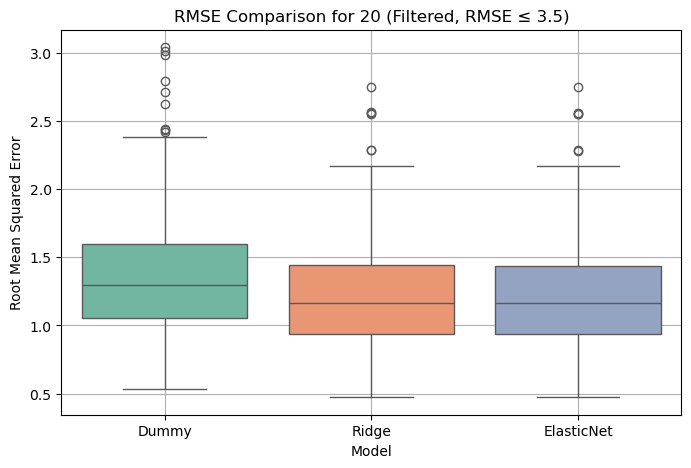

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_baseline_df, x="Model", y="rmse_mean", hue="Model", legend=False, palette="Set2")
plt.title(f"RMSE Comparison for {NUM_PCS} (Filtered, RMSE ≤ 3.5)")
plt.ylabel("Root Mean Squared Error")
plt.grid(True)
plt.savefig(f"results/rmse_comparison_{NUM_PCS}_pcs.png", dpi=300)
plt.show()
plt.close()

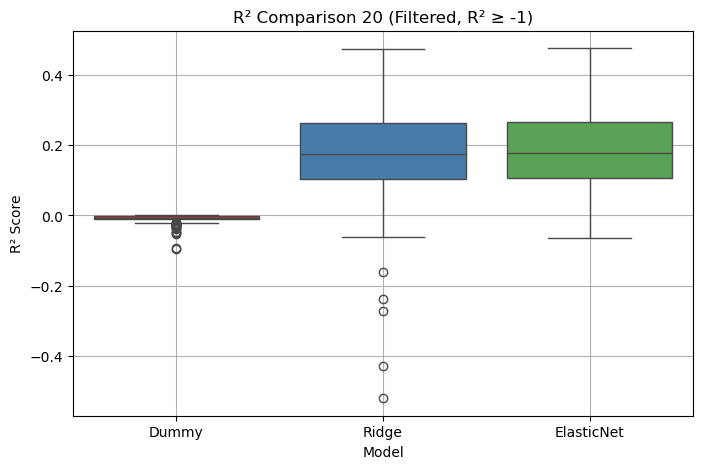

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_baseline_df, x="Model", y="r2_mean", hue="Model", legend=False, palette="Set1")
plt.title(f"R² Comparison {NUM_PCS} (Filtered, R² ≥ -1)")
plt.ylabel("R² Score")
plt.grid(True)
plt.savefig(f"results/r2_comparison_{NUM_PCS}_pcs.png", dpi=300)
plt.show()
plt.close()

### 📌 Summary Statistics (Simple Models)


In [8]:
filtered_baseline_df.groupby("Model")[["rmse_mean", "r2_mean"]].agg(["mean", "std", "median"]).round(4)


rmse_mean                 r2_mean                
                mean     std  median    mean     std  median
Model                                                       
Dummy         1.3535  0.4179  1.2984 -0.0081  0.0085 -0.0061
ElasticNet    1.2068  0.3645  1.1616  0.1879  0.1014  0.1766
Ridge         1.2100  0.3662  1.1655  0.1822  0.1122  0.1738